<a href="https://colab.research.google.com/github/Tanveer87/Machine-Deep-Learning/blob/master/06_Fully_Connected_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
#Sequential API to create models
from keras.models import Sequential

#Components to create a model
from keras.layers import Dense, Input

# Stochastic Gradient Desent Algorithm
from keras.optimizers import SGD

# Keras Already Hosted MNIST Dataset For Us
from keras.datasets import mnist

# An Keras Utlity To Binarize Integers
from keras.utils import to_categorical

# An Keras Utitty To Visualize Model Graph
from keras.utils import plot_model

# Another ML library That Has Many Utilities For Image Operation
import skimage

# Here We Will Use Only Two Of It's Utilities
from skimage.io import imshow

# Another Python Library For Ploting Things
import matplotlib.pyplot as plt

# Another Python Library To Manipulate Vectors, Matrices, Arrays Etc.
import numpy as np

# **Hyperparameters Parameters**

In [2]:
# Whole Dataset Splits Into Batches
batch_size = 128

# Number of labels of our Dataset
nb_classes = 10

# Number of Times We Want To Train The Model
nb_epoch = 10

# **Load Data**

In [3]:
# Load MNIST Dataset
# Data Split Into Two Sub:set Training And Test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **Data Statistics**

In [4]:
print("Number of Training Samples: ", len(x_train))
print("Number of Associated Labels: ", len(y_train))

Number of Training Samples:  60000
Number of Associated Labels:  60000


In [5]:
# 60000 Sample, Hight 28 and Width 28
print("Shape of Training Data: ", x_train.shape)

Shape of Training Data:  (60000, 28, 28)


In [6]:
print("Data Type of Training Samples: ", x_train.dtype)

Data Type of Training Samples:  uint8


In [7]:
print("Number of Training Samples: ", len(x_test))
print("Number of Associated Labels: ", len(y_test))

Number of Training Samples:  10000
Number of Associated Labels:  10000


In [8]:
print("Shape of Training Labels: ", y_train.shape)

Shape of Training Labels:  (60000,)


In [9]:
print("Shape of Test Data: ", x_test.shape)

Shape of Test Data:  (10000, 28, 28)


In [10]:
print("Data Type of Test Samples: ", x_test.dtype)

Data Type of Test Samples:  uint8


In [11]:
print("Shape of Training Labels: ", y_test.shape)

Shape of Training Labels:  (10000,)


# **Visualize Data**

In [12]:
# A single sample among 60,000 samples
x_train[0].shape

(28, 28)

In [13]:
a_random_sample = x_train[0]

# Pixel Values Of The Samples
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

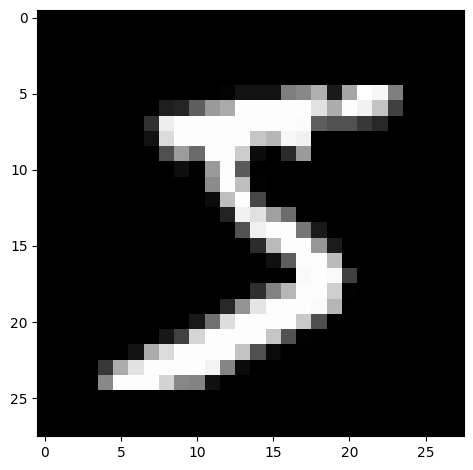

In [14]:
# Get A Random Sample
random_image = x_train[0]

# Display it
imshow(random_image)

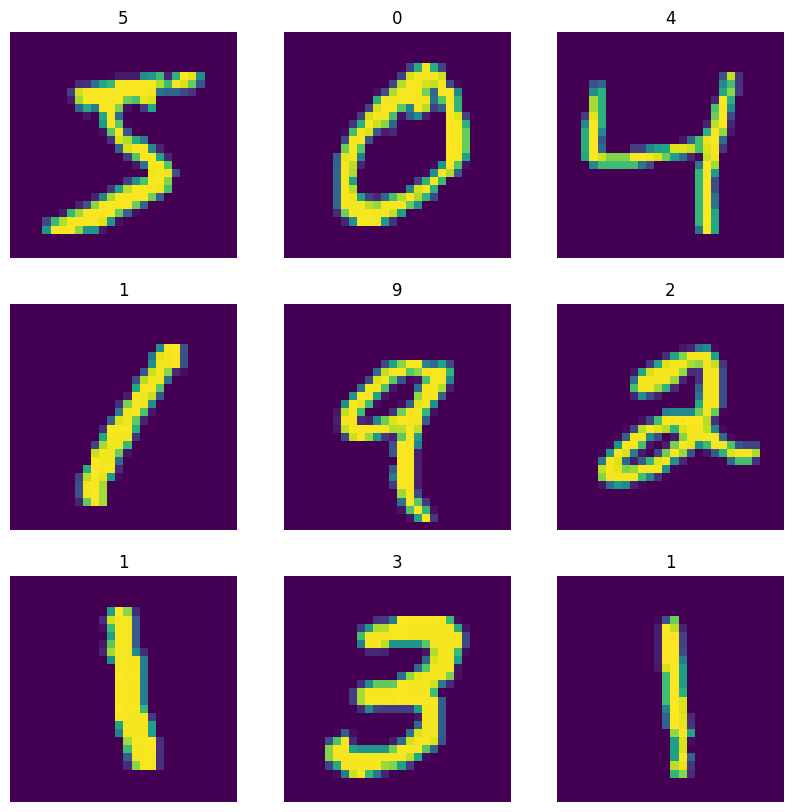

In [15]:
# Define The Size Of The Figure
plt.figure(figsize = (10, 10))

for i in range(9):
  ac = plt.subplot(3, 3, i + 1)

  # Get A Sample At Index i
  an_image = x_train[i]

  # Display The Sample
  plt.imshow(an_image)

  # Display The Label Of The Sample As Title
  plt.title(int(y_train[i]))

  plt.axis("off")

# **Reshape and Flatten Data**

In [16]:
print("Shape of Training Data: ", x_train.shape)

print("Shape of Training Samples: ", x_train[0].shape)

Shape of Training Data:  (60000, 28, 28)
Shape of Training Samples:  (28, 28)


In [17]:
# Get A Sample Image
an_image = x_train[0]

print("Shape of Sample Image: ", an_image.shape)

# Define New Shape and Flatten The Image
new_shape = 28*28
flattend_an_image = an_image.reshape(new_shape, )

print("Shape of the Flattened Image: ", flattend_an_image.shape)

Shape of Sample Image:  (28, 28)
Shape of the Flattened Image:  (784,)


In [18]:
print("Previous Shape of x_train: ", x_train.shape)

# Flatten The Whole Training Data
x_train = x_train.reshape(60000, 784)

print("New Shape of X_train: ", x_train.shape)

Previous Shape of x_train:  (60000, 28, 28)
New Shape of X_train:  (60000, 784)


In [19]:
print("Previous Shape of x_test: ", x_test.shape)

# Flatten The Whole Test Data
x_test = x_test.reshape(10000, 784)

print("New Shape of X_test: ", x_test.shape)

Previous Shape of x_test:  (10000, 28, 28)
New Shape of X_test:  (10000, 784)


In [20]:
print("Previous Datatype Of Train and Test Samples: ")
print(x_train.dtype)
print(x_test.dtype)

# Change Data Type Of Train and Test Data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print("New Datatype Of Train and Test Samples: ")
print(x_train.dtype)
print(x_test.dtype)

Previous Datatype Of Train and Test Samples: 
uint8
uint8
New Datatype Of Train and Test Samples: 
float32
float32


# **Rescaling Data**

In [21]:
# Get A Random Sample
a_sample = x_train[0]

print("Min Value Of Sample: ", a_sample.min())
print("Max Value Of Sample: ", a_sample.max())

Min Value Of Sample:  0.0
Max Value Of Sample:  255.0


In [22]:
# Device Each Value In Train and Test Data By 255
x_train /= 255.0
x_test /= 255.0

In [23]:
# Get A Sample
a_sample = x_train[0]

print("Min Value Of Sample: ", a_sample.min())
print("Max Value Of Sample: ", a_sample.max())

Min Value Of Sample:  0.0
Max Value Of Sample:  1.0


# **Binarize Labels**

In [24]:
# Display The Training Labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
# Shape Of Training Label
y_train.shape

(60000,)

In [28]:
# A Random Array
input_array = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(input_array)
print("Input array shape: ", input_array.shape)

# Apply To_categorical To The Random Array
output = to_categorical(input_array, num_classes = 10)

print(output)
print("Input list shape: ", input_array.shape)

[0 1 2 3 4 5 6 7 8 9]
Input array shape:  (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Input list shape:  (10,)


In [29]:
# Apply To_categorical To The Train Labels
y_train = to_categorical(y_train, nb_classes)

# Apply To_categorical To The Train Labels
y_test = to_categorical(y_test, nb_classes)

# **Define Model**(Multilayer Perceptron Model)


In [31]:
# Multilayer Perceptron Model

# We Want To Create A Sequentially Stacked Model Using Keras Sequential API
model = Sequential()

# Set Up Input Layer
model.add(Input(shape = (784,)))

# 1st Layer In The Model To Receive Inputs
model.add(Dense(784, activation = 'relu'))

# Hidden Layer
model.add(Dense(625, activation = 'relu'))

# Output Layer
model.add(Dense(10, activation = 'softmax'))

# **Compile Model**

In [33]:
# Choose Learning Rate
learning_rate = 0.001  # Standard Learning Rate

# Select Optimizer
optimizer = SGD(learning_rate = learning_rate)

# Select Loss Function / Cost Function
loss = 'categorical_crossentropy'

# Select Evaluation Metrics
metrics = ['accuracy']

# Model Compilation
model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

# **Visualize Model**

In [34]:
# A Sumary Of Inputs, Outputs in each layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 784)               615440    
                                                                 
 dense_4 (Dense)             (None, 625)               490625    
                                                                 
 dense_5 (Dense)             (None, 10)                6260      
                                                                 
Total params: 1112325 (4.24 MB)
Trainable params: 1112325 (4.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h1>Formula: inputs * outputs + bias</h1>
---------------------------------------------------------------------------------------------------
<h3>Parameters(Params) in First Layer:</h3>
<h4>
inputs = 784 </br>
outputs = 784 </br>
bias = 784
</h4>
Totalparam = 784 * 784 + 784 = 61,5440

<h3>Parameters(Params) in Output Layer:</h3>
<h4>
inputs = 625</br>
outputs = 10</br>
bias = 10
</h4>
Totalparam = 625 * 10 + 10 = 6260


<h4>Total Trainable Parameters(params)

615440 + 490625 + 6260 = 1112325


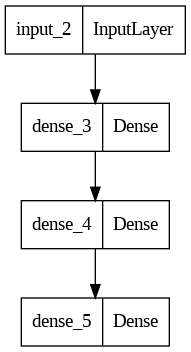

In [35]:
plot_model(model)

# **Model Training**

In [36]:
# Train
history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10) and (None, 10) are incompatible


## Inference On Test Data


In [ ]:
history = model.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 783), found shape=(None, 784)


# **Interface on Test Data**

In [37]:
# Evaluate
evaluation = model.evaluate(x_test, y_test)

# Display Test Statistics
print("Summary: Loss over the test dataset: %.2f, Accuracy: %.2f" % (evaluation[0] * 100, evaluation[1] * 100))

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10) and (None, 10) are incompatible


In [39]:
# Get Training Loss Histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize Loss History
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.xlabel('Loss')

plt.show();

NameError: name 'history' is not defined

In [ ]:
# Get Training Accuracy Histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize Loss History
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')

plt.show();